In [ ]:
#import block
import tensorflow as tf
import h5py
import numpy as np
import json
import pandas as pd
import math
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

In [ ]:
#Function block for grabbing a section of the data
def grabData(start=0, stop=0, step=8):
  if(stop == 0):
    samples = hdf5_file['X'][start::step]
    modulation_classes = hdf5_file['Y'][start::step]
    snr = hdf5_file['Z'][start::step]
  else:
    samples = hdf5_file['X'][start:stop:step]
    modulation_classes = hdf5_file['Y'][start:stop:step]
    snr = hdf5_file['Z'][start:stop:step]

  mod_array = np.zeros(len(modulation_classes))
  i = 0
  for x in modulation_classes:
    mod_array[i] = np.where(x==1)[0][0]
    i = i + 1

  return samples, mod_array, snr

In [ ]:
#function block for shuffling dataset
def shuffleDataset(samp, mod, snr):
  samp, mod, snr = shuffle(samp, mod, snr, random_state=0)
  return samp, mod, snr

In [ ]:
#function block for splitting dataset into training, validation, and testing
#creates tf.Dataset objects
def datasetSplit(samples, mod, snr, training_index=.8, validation_index=.1):
  trn_ind = math.floor(len(mod) * training_index)
  val_ind = math.floor(len(mod) * validation_index)

  training_set, training_label, training_snr = samples[:trn_ind:], mod[:trn_ind:], snr[:trn_ind:]
  validation_set, validation_label, validation_snr = samples[trn_ind:trn_ind+val_ind:], mod[trn_ind:trn_ind+val_ind:], snr[trn_ind:trn_ind+val_ind:]
  test_set, test_label, test_snr = samples[trn_ind+val_ind::], mod[trn_ind+val_ind::], snr[trn_ind+val_ind::]

  tr_dataset = tf.data.Dataset.from_tensor_slices((training_set, training_label))
  val_dataset = tf.data.Dataset.from_tensor_slices((validation_set, validation_label))
  test_dataset = tf.data.Dataset.from_tensor_slices((test_set, test_label))

  return tr_dataset, val_dataset, test_dataset

In [ ]:
#function for performing changes to the tf.Dataset objects like batching, shuffling, etc.
def datasetManip(dset, batch_s=100, buf_s=1000, drop_rem=True):
  dset_trans = dset.shuffle(buffer_size=buf_size).batch(batch_s, drop_remainder=drop_rem)
  return dset_trans

In [ ]:
#function block for compiling and fitting model
#returns the history callback of the trained model
def trainModel(model, loss_func, trn, val, optim='Adam', num_epochs=10):
  model.compile(optimizer=optim, loss=loss_func, metrics=['accuracy'])
  model.summary()
  model_history = model.fit(trn, epochs=num_epochs, validation_data=val, verbose=1)
  return model_history

In [15]:
#function block to plot a model's loss and accuracy through its history
def plotHistory(hist, plot_title):
  #summarize history for accuracy
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  
  full_title = plot_title + " accuracy"
  plt.title(full_title)
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  
  plt.show()
  #summarize history for loss
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  
  full_title = plot_title + " loss"
  plt.title(full_title)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  
  plt.show()

In [ ]:
#function block for using model for predictions

In [10]:
#block for writing out models to be tested

#write out models to be tested
five_layers = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(64, 3, activation='relu', 
                  input_shape=(img_width, img_height)),
      tf.keras.layers.MaxPooling1D(2, 2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.selu),
      tf.keras.layers.Dense(128, activation=tf.nn.selu),
      tf.keras.layers.Dense(24, activation=tf.nn.softmax)
    ])

six_layers = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(64, 3, activation='relu', 
                  input_shape=(img_width, img_height)),
      tf.keras.layers.MaxPooling1D(2, 2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.selu),
      tf.keras.layers.Dense(128, activation=tf.nn.selu),
      tf.keras.layers.Dense(24, activation=tf.nn.softmax)
    ])

seven_layers = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(64, 3, activation='relu', 
                  input_shape=(img_width, img_height)),
      tf.keras.layers.MaxPooling1D(2, 2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.selu),
      tf.keras.layers.Dense(128, activation=tf.nn.selu),
      tf.keras.layers.Dense(24, activation=tf.nn.softmax)
    ])

eight_layers = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(64, 3, activation='relu', 
                  input_shape=(img_width, img_height)),
      tf.keras.layers.MaxPooling1D(2, 2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Conv1D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.selu),
      tf.keras.layers.Dense(128, activation=tf.nn.selu),
      tf.keras.layers.Dense(24, activation=tf.nn.softmax)
    ])

#put the model objects in here
model_list = [five_layers, six_layers, seven_layers, eight_layers]

#put the model names in here
model_names = ["five_layers", "six_layers", "seven_layers", "eight_layers"]

In [9]:
#Main block for calling functions
##code block for loading in DeepSig data from hdf5 file

# Open the dataset
hdf5_file = h5py.File("/content/content/DeepSig_shuffled/DeepSig_XYZ_OSC.0001_1024_Shuffled.hdf5",  'r')
# Load the modulation classes. You can also copy and paste the content of classes-fixed.txt.
modulation_classes = json.load(open("/content/content/DeepSig_shuffled/classes-fixed.json", 'r'))
#List groups of the hdf5 file
list(hdf5_file.keys())
#DeepSig image input shape
img_width, img_height, img_channels = (1024, 2, 1)

In [12]:
#Grabbing data and creating datasets

#variable block
start = 0
stop = 0
fraction = 8 #takes 1/fraction of the original dataset
train_split = .8
val_split = .1
buf_size = 10000
batch_size = 1000
drop_rem = True

#dataset split creation block
samples, mod, snr = grabData(start, stop, fraction)
samples, mod, snr = shuffleDataset(samples, mod, snr)
train_ds, val_ds, test_ds = datasetSplit(samples, mod, snr, train_split, val_split)
train_ds = datasetManip(train_ds, batch_size, buf_size, drop_rem)
val_ds = datasetManip(val_ds, batch_size, buf_size, drop_rem)
test_ds = datasetManip(test_ds, batch_size, buf_size, drop_rem)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1022, 64)          448       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 511, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 509, 64)           12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 254, 64)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 252, 64)           12352     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 126, 64)          0

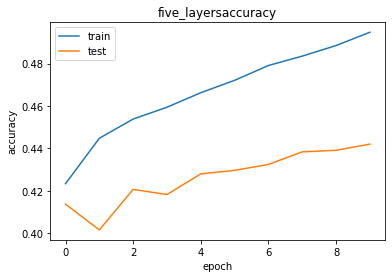

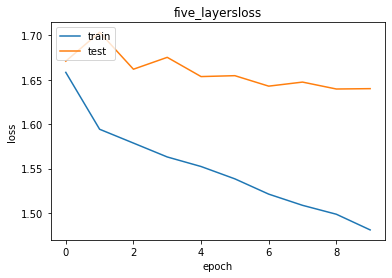

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 1022, 64)          448       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 511, 64)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 509, 64)           12352     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 254, 64)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 252, 64)           12352     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 126, 64)         

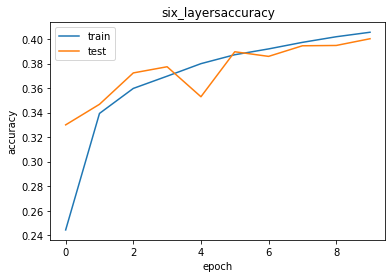

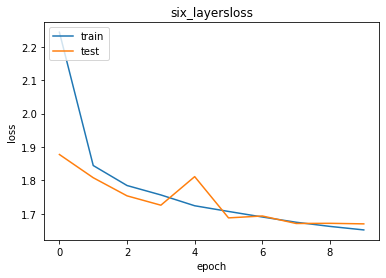

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 1022, 64)          448       
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 511, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_12 (Conv1D)          (None, 509, 64)           12352     
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 254, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 252, 64)           12352     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 126, 64)         

In [ ]:
#Setting model variables, compiling/training models, and graphing metrics

#variable block
optimizer = 'Adam'
loss_function = 'sparse_categorical_crossentropy'
number_of_epochs = 10

model_histories = []
ind = 0;
for x in model_list:
  current_history = trainModel(x, loss_function, train_ds, val_ds, optimizer, number_of_epochs)
  model_histories.append(current_history)
  plotHistory(current_history, model_names[ind])
  ind = ind + 1

In [ ]:
! unzip /content/drive/MyDrive/DS_shuffled.zip -d /content/

Archive:  /content/drive/MyDrive/DS_shuffled.zip
   creating: /content/content/DeepSig_shuffled/
  inflating: /content/content/DeepSig_shuffled/datasets.desktop  
  inflating: /content/content/DeepSig_shuffled/DeepSig_XYZ_OSC.0001_1024_Shuffled.hdf5  
  inflating: /content/content/DeepSig_shuffled/classes-fixed.json  
  inflating: /content/content/DeepSig_shuffled/LICENSE.TXT  
  inflating: /content/content/DeepSig_shuffled/classes.txt  
  inflating: /content/content/DeepSig_shuffled/classes-fixed.txt  
